# Regresi Logistik
Regresi logistik adalah sebuah pendekatan untuk membuat model prediksi seperti halnya regresi linear atau yang biasa disebut dengan istilah Ordinary Least Squares (OLS) regression. Perbedaannya adalah pada regresi logistik, peneliti memprediksi variabel terikat yang berskala dikotomi. Skala dikotomi yang dimaksud adalah skala data nominal dengan dua kategori, misalnya: Ya dan Tidak, Baik dan Buruk atau Tinggi dan Rendah.

Penjelasan Dataset
Dataset kali ini adalah data dari suatu Kafe X yang dimana berupa penilaian suatu menu dari pelanggan, karyawan, dan petinggi untuk diketahui apakah item tersebut dirasa perlu di-bundle atau tidak dengan makanan lain?
1 = Tidak perlu bundling/paket
0 = perlu bundling/paket

In [1]:
#1.	Memasang library yang dibutuhkan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
#2.	Membaca file
data = pd.read_csv("C:/Users/Kevin Valerian/Desktop/Semester 5/Data Science dan Analytics/Praktikum DSDA/Order_Bundle_WP.csv", sep=";") #Sesuaikan dengan directory file masing-masing

In [3]:
#3.	Menampilkan n data
data.head(4)

,Id,Penilaian_dari_pelanggan,Penilaian_dari_karyawan,Penilaian_dari_petinggi,Perlu_dipaket?
0,1,880,3,3,1
1,2,750,1,3,1
2,3,700,1,1,1
3,4,751,1,2,1


In [4]:
#4.	Menampilkan tipe data kolom
data.dtypes

Id                          int64
Penilaian_dari_pelanggan    int64
Penilaian_dari_karyawan     int64
Penilaian_dari_petinggi     int64
Perlu_dipaket?              int64
dtype: object

In [5]:
#5.	Menampilkan deskripsi kolom
data.describe()

,Id,Penilaian_dari_pelanggan,Penilaian_dari_karyawan,Penilaian_dari_petinggi,Perlu_dipaket?
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,15.500000,671.400000,2.733333,2.166667,0.700000
std,8.803408,99.421291,1.229896,0.833908,0.466092
min,1.000000,504.000000,1.000000,1.000000,0.000000
25%,8.250000,595.000000,1.250000,1.250000,0.000000
50%,15.500000,691.000000,3.000000,2.000000,1.000000
75%,22.750000,745.500000,4.000000,3.000000,1.000000
max,30.000000,880.000000,4.000000,3.000000,1.000000


# Pengolahan Regresi Logistik

In [6]:
#6.	Menentukan variabel independen dan dependen
X = data[['Penilaian_dari_pelanggan','Penilaian_dari_karyawan','Penilaian_dari_petinggi']]
y = data['Perlu_dipaket?']

# Memisahkan antara data yang diuji dengan data yang dilatih
Terlihat bahwa test_size = 0.3 yang artinya data yang diuji sebanyak 30% dari total data
contoh:
Total data di Order_Bundle_WP sebanyak 30 baris, maka data yang diuji adalah 30*30% = 9 data yang diuji

In [7]:
#7.	Mengatur data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [8]:
#8.	Menerapkan regresi logistik
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)

# Confusion Matrix
Terlihat bahwa hasil dari confusion matrix
#Prediksi BENAR
Nilai yang sebenarnya 0 dan prediksi 0 sebanyak 1 buah
Nilai yang sebenarnya 1 dan prediksi 1 sebanyak 7 buah
#Prediksi SALAH
Nilai yang sebenarnya 0 dan prediksi 1 sebanyak 1 buah
Nilai yang sebenarnya 1 dan prediksi 0 sebanyak 0 buah

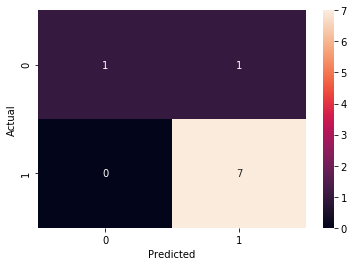

In [9]:
#9.	Menampilkan confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

# Akurasi
Terlihat bahwa akurasinya adalah 0.88, cari persentase dari hasil akurasi dengan dikalikan 100% maka hasilnya adalah 88%

In [10]:
#10.	Menampilkan akurasi dari prediksi
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.8888888888888888


In [11]:
#11.	Melihat data yang diuji
print (X_test)

    Penilaian_dari_pelanggan  Penilaian_dari_karyawan  Penilaian_dari_petinggi
2                        700                        1                        1
28                       796                        4                        2
13                       649                        4                        3
10                       632                        3                        1
26                       627                        4                        1
24                       695                        3                        3
27                       770                        4                        2
11                       800                        2                        1
17                       536                        3                        3


In [12]:
#12.	Melihat hasil prediksi
print (y_pred)

[1 1 1 1 1 1 1 1 0]


# Prediksi dengan menambah data baru
Membuat data frame dengan menambah data yang diuji dengan value pada masing-masing kolom:
Penilaian_dari_pelanggan: 500, 600
Penilaian_dari_karyawan: 2, 4
Penilaian_dari_petinggi: 1, 3

In [13]:
#13.	Menguji data yang baru
new_predict = {'Penilaian_dari_pelanggan': [500, 600],
               'Penilaian_dari_karyawan':[2, 4],
               'Penilaian_dari_petinggi':[1, 3]
                  }

df2 = pd.DataFrame(new_predict,columns= ['Penilaian_dari_pelanggan','Penilaian_dari_karyawan','Penilaian_dari_petinggi'])

In [14]:
#14.	Menerapkan regresi logistik pada data yang baru
y_pred=logistic_regression.predict(df2)

In [15]:
#15.	Menampilkan data baru yang akan diuji
print (df2)

   Penilaian_dari_pelanggan  Penilaian_dari_karyawan  Penilaian_dari_petinggi
0                       500                        2                        1
1                       600                        4                        3


In [16]:
#16.	Menampilkan hasil data prediksi data baru yang baru saja diuji
print (y_pred)

[0 1]


# LATIHAN 2

In [20]:
new_predict = {'Penilaian_dari_pelanggan': [560, 660],
               'Penilaian_dari_karyawan':[2, 2],
               'Penilaian_dari_petinggi':[1, 2]
                  }

df3 = pd.DataFrame(new_predict,columns= ['Penilaian_dari_pelanggan','Penilaian_dari_karyawan','Penilaian_dari_petinggi'])
y_pred=logistic_regression.predict(df3)
print(df3)

   Penilaian_dari_pelanggan  Penilaian_dari_karyawan  Penilaian_dari_petinggi
0                       560                        2                        1
1                       660                        2                        2


In [23]:
new_predict = {'Penilaian_dari_pelanggan': [700, 600],
               'Penilaian_dari_karyawan':[4, 1],
               'Penilaian_dari_petinggi':[2, 1]
                  }

df4 = pd.DataFrame(new_predict,columns= ['Penilaian_dari_pelanggan','Penilaian_dari_karyawan','Penilaian_dari_petinggi'])
y_pred=logistic_regression.predict(df4)
print(df4)

   Penilaian_dari_pelanggan  Penilaian_dari_karyawan  Penilaian_dari_petinggi
0                       700                        4                        2
1                       600                        1                        1


In [22]:
new_predict = {'Penilaian_dari_pelanggan': [560, 660, 700, 600],
               'Penilaian_dari_karyawan':[2, 2, 4, 1],
               'Penilaian_dari_petinggi':[1, 2, 2, 1]
                  }

df5 = pd.DataFrame(new_predict,columns= ['Penilaian_dari_pelanggan','Penilaian_dari_karyawan','Penilaian_dari_petinggi'])
y_pred=logistic_regression.predict(df5)
print(df5)

   Penilaian_dari_pelanggan  Penilaian_dari_karyawan  Penilaian_dari_petinggi
0                       560                        2                        1
1                       660                        2                        2
2                       700                        4                        2
3                       600                        1                        1
